In [6]:
import networkx as nx
import numpy as np
import numpy.random as rand
from collections import deque
import matplotlib.pyplot as plt

day  1  infected at start  1
day  2  infected at start  5
day  3  infected at start  16
day  4  infected at start  38
day  5  infected at start  71
day  6  infected at start  89
day  7  infected at start  92
inf 93
[[10, 16, 27, 60, 93, 4, 15, 18, 36, 49, 64, 65, 78, 82, 90, 97, 55, 68, 75, 94, 2, 8, 31, 40, 57, 91, 95, 0, 7, 14, 17, 47, 54, 62, 73, 76, 85, 92, 3, 23, 37, 38, 42, 52, 61, 1, 34, 35, 53, 72, 5, 9, 21, 45, 59, 13, 24, 44, 50, 71, 12, 32, 46, 48, 63, 99, 39, 81, 96, 29, 88, 58, 20, 98, 28, 43, 66, 74, 84, 67, 80, 86, 89, 41, 51, 79, 87, 19, 70, 25, 26, 56, 6], [10, 16, 27, 60, 4, 18, 36, 49, 64, 65, 78, 82, 97, 90, 55, 68, 75, 94, 2, 31, 57, 91, 95, 0, 7, 14, 17, 54, 85, 93, 40, 62, 73, 76, 92, 3, 23, 37, 38, 61, 1, 53, 72, 5, 21, 45, 13, 24, 50, 71, 12, 32, 46, 48, 63, 99, 39, 81, 96, 29, 88, 15, 8, 47, 52, 34, 59, 44, 58, 20, 98, 43, 84, 67, 80, 41, 51, 79, 87, 19, 70, 42, 35, 9, 28, 66, 74, 86, 25, 26, 89, 6], [10, 16, 27, 60, 93, 4, 15, 18, 36, 49, 64, 65, 78, 82, 90, 

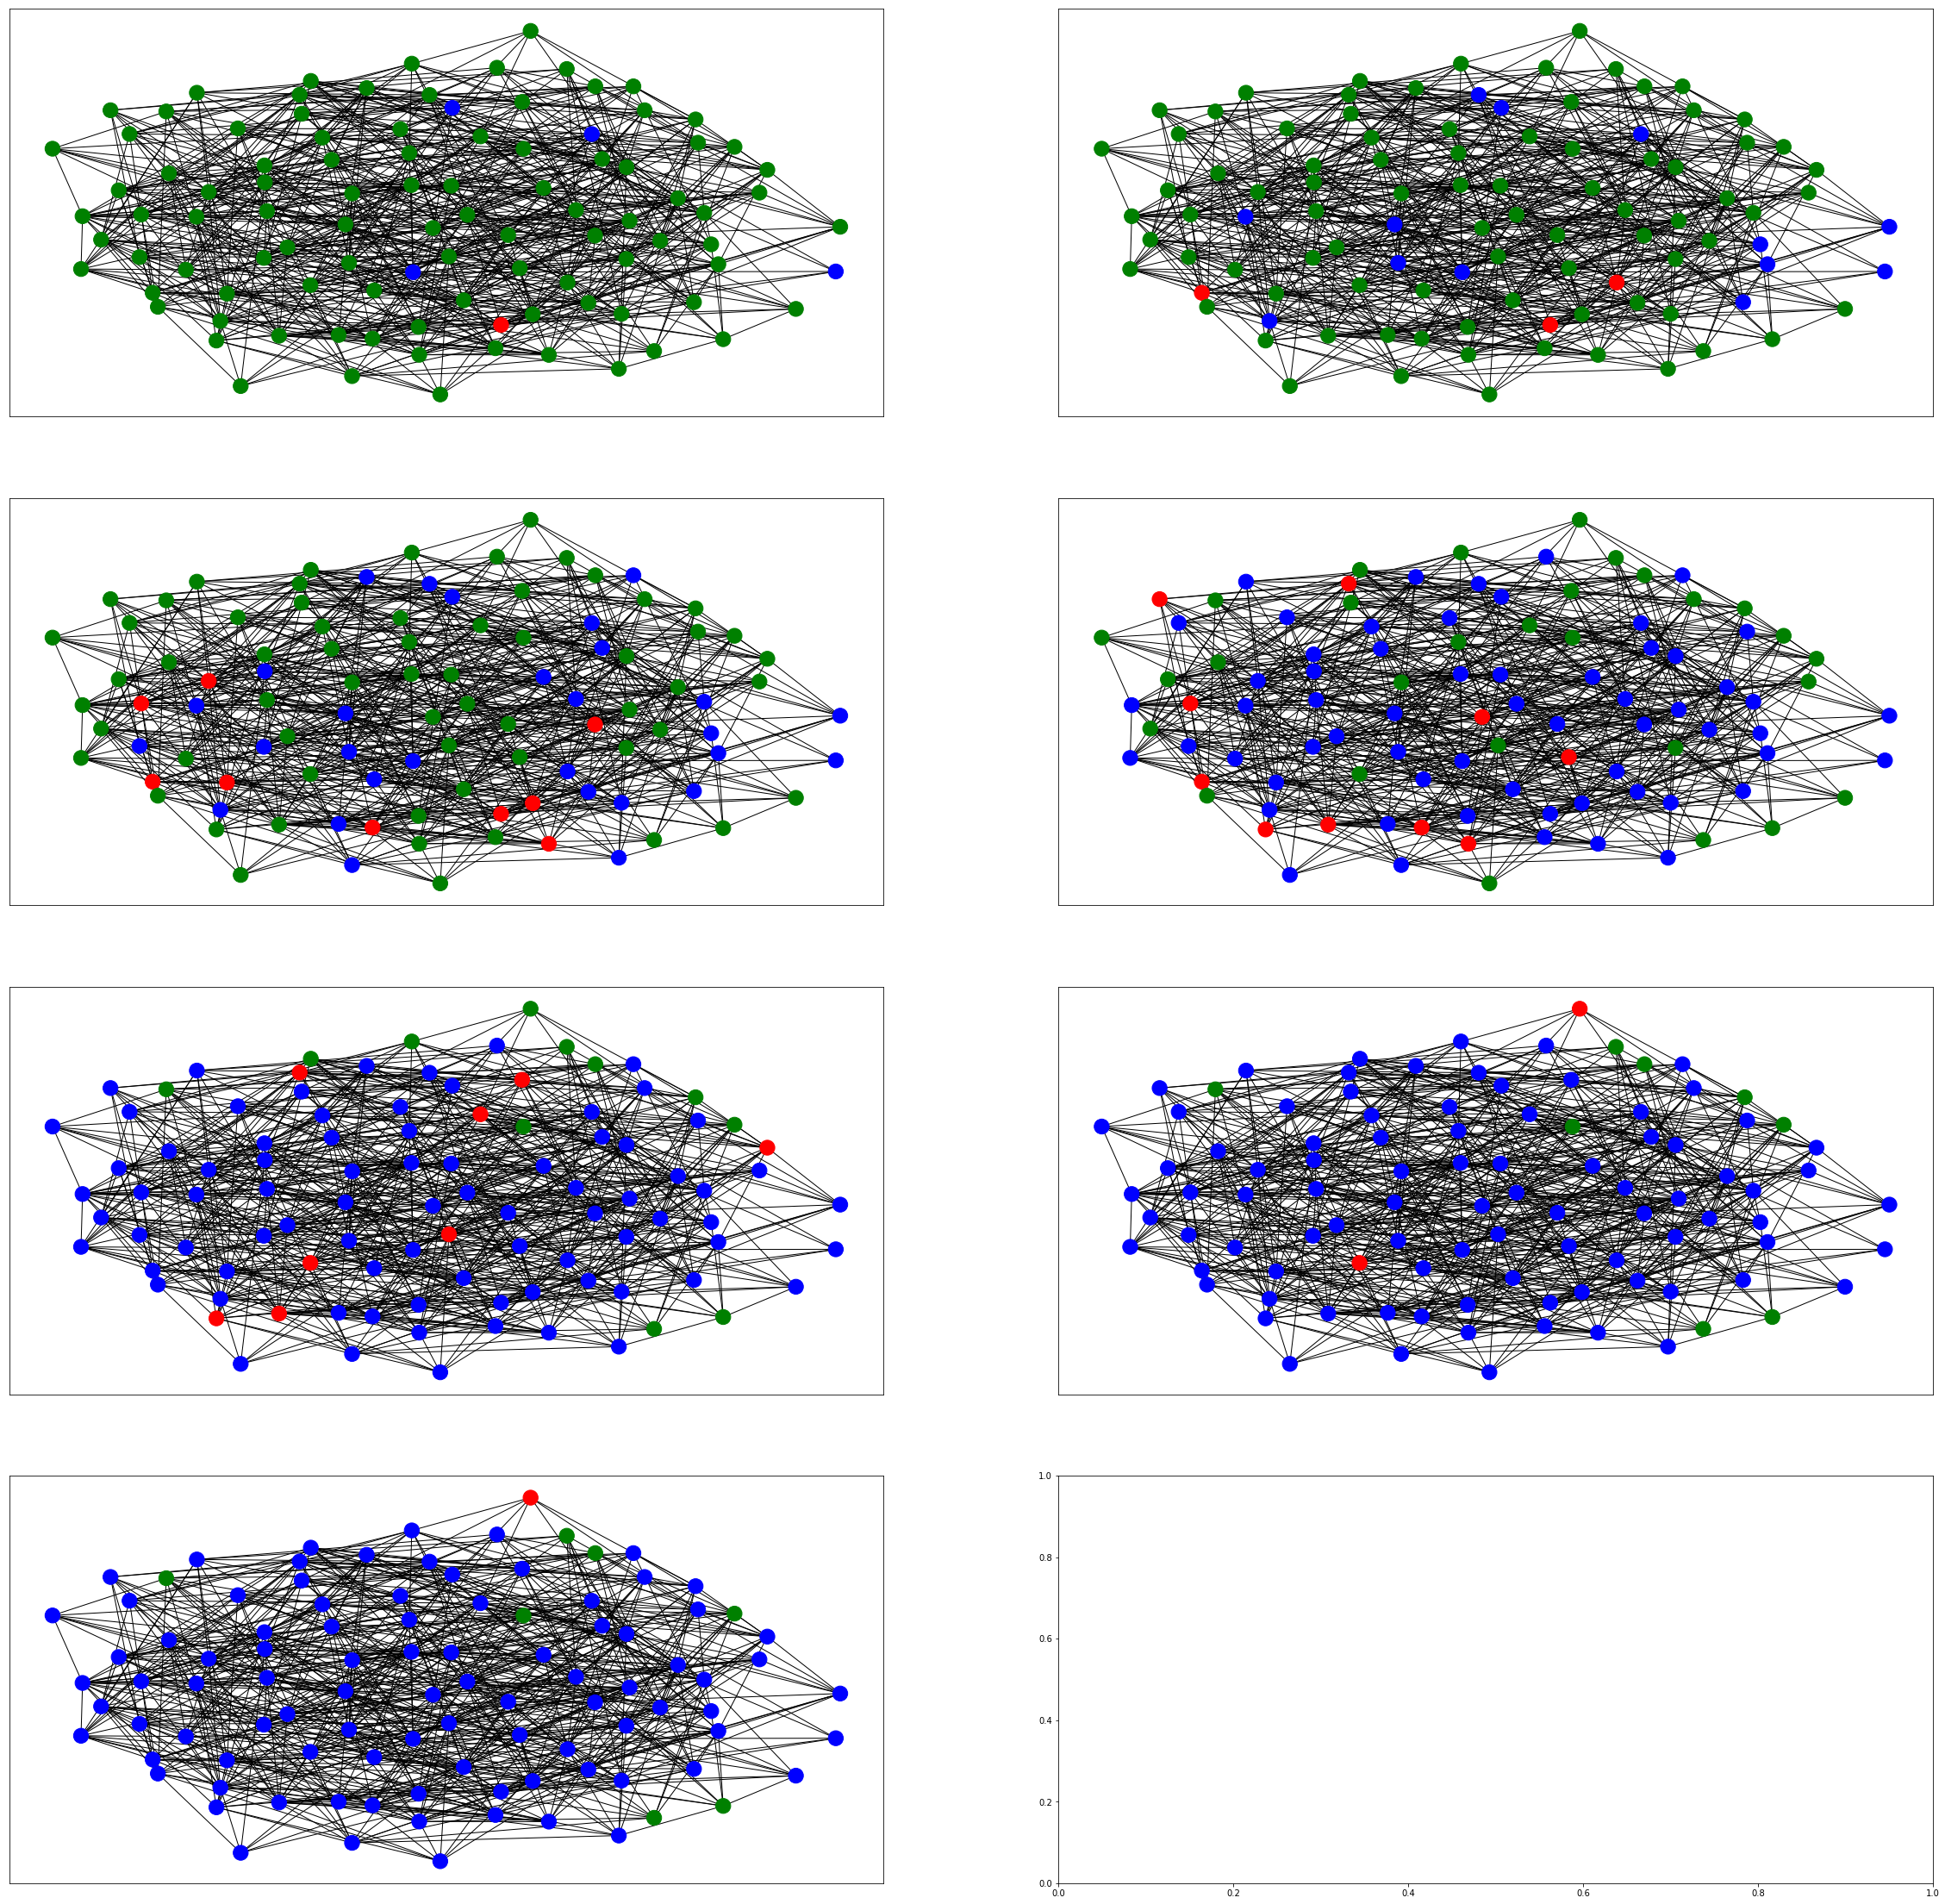

In [60]:
def BFS_t(Gr,zero,p,q,s,h,d):
    if d%2 == 0:
        nrows = int(d/2)
    else:
        nrows = int(d/2)+1
    ncols = 2
    f, axes = plt.subplots(nrows, ncols, figsize = (40,40))

    # Mark all the vertices as not visited
    infected = [False] * Gr.number_of_nodes()
    symptomatic = [False] * Gr.number_of_nodes()
    quarantined = [False] * Gr.number_of_nodes()
    k=1
    days_rem = d
    # Create a queue for BFS
    queue = []
    infected_nodes = []
    symptomatic_nodes = []
    quarantined_nodes = []
    # Mark the source node as
    # visited and enqueue it
    queue.append(zero)
    infected[zero] = True
    infected_nodes.append(zero)
    while days_rem > 0:
        days_rem-=1
        print("day ",(d-days_rem)," infected at start ",k)
        while queue:
            s = queue.pop(0)
            for i in Gr.neighbors(s):
                if infected[i]==False:
                    if symptomatic[s]==True:
                        if rand.uniform(0,10) < p*10:
                            infected[i] = True
                            infected_nodes.append(i)
                            k+=1
                    else:
                        if rand.uniform(0,10) < q*10:
                            infected[i] = True
                            infected_nodes.append(i)
                            k+=1

        for i in infected_nodes:
            if symptomatic[i] == False:
                    if rand.uniform(0,10) < s*(d-days_rem)*10:
                            symptomatic[i] = True
                            symptomatic_nodes.append(i)
            if symptomatic[i]==True and quarantined[i] == False:
                    if rand.uniform(0,10) < h*10:
                            quarantined[i] = True
                            quarantined_nodes.append(i)

            if quarantined[i] == False:
                queue.append(i)
        
        colvec = [0]* Gr.number_of_nodes()
        for i in range(Gr.number_of_nodes()):
            if quarantined[i]:
                colvec[i] = 'b'
            elif symptomatic[i]:
                colvec[i] = 'r'
            elif infected[i]:
                colvec[i] = 'y'
            else:
                colvec[i] = 'g'
        
        ColorLegend = {'Quarantined': 1,'Symptomatic': 2,'Infected': 3,'Susceptible': 4}
                
        #n = nx.draw_networkx(Gr, pos=nx.kamada_kawai_layout(Gr), node_color=colvec, cmap=plt.cm.rainbow, ax = axes[int((d-days_rem-1)/2)][(d-days_rem-1)%2]) #visualizes
        layout = nx.kamada_kawai_layout(Gr)
        nx.draw_networkx_nodes(Gr, pos = layout, node_color = colvec, ax = axes[int((d-days_rem-1)/2)][(d-days_rem-1)%2])
        nx.draw_networkx_edges(Gr, pos = layout, ax = axes[int((d-days_rem-1)/2)][(d-days_rem-1)%2])
        #sm = plt.cm.ScalarMappable(cmap=plt.cm.rainbow, norm = None)
        #m.set_array([])
        #cbar = plt.colorbar(sm)
        

    print("inf",k)
    return [infected_nodes,quarantined_nodes,symptomatic_nodes]
G = nx.gnp_random_graph(100,0.15)
print(BFS_t(G,10,0.7,0.5,0.9,0.7,7))

In [12]:
int(7/2)

3

In [298]:
def cleanGraph(infile):
    # takes gexf file
    # output: better indexed network, dict of node labels to easier indices
    Gr = nx.read_gexf(infile)
    inds = {}
    for i in list(Gr.nodes):
        inds[i] = Gr.nodes[i]
    Gr = nx.convert_node_labels_to_integers(Gr)
    return Gr, inds